In [1]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.model_selection import cross_validate
from sklearn.metrics import accuracy_score, f1_score, make_scorer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import KFold
from statistics import mean
from scipy.stats import ttest_rel

In [2]:
df = pd.read_csv("/home/salvo/PycharmProjects/DMML_project/Dataset/preprocessed_dataset.csv")
df_notna = pd.read_csv("/home/salvo/PycharmProjects/DMML_project/Dataset/preprocessed_notna_dataset.csv")

# Comparing classifiers with features Selection

In [3]:
def test_classifier(clf,df,df_notna):
    x = df.drop(axis=1,labels='Class/ASD')
    x_notna = df_notna.drop(axis=1,labels='Class/ASD')

    y = df['Class/ASD']
    y_notna = df_notna['Class/ASD']

    estimators = [('clf',clf)]
    pipe = Pipeline(estimators)
    kf = KFold(n_splits=10)

    results = cross_validate(pipe,
                         x,
                         y,
                         scoring = {'fscore': make_scorer(f1_score),
                                    'accuracy': make_scorer(accuracy_score)},
                         return_estimator = True,
                         cv = kf,
                         n_jobs = -1)
    results_notna = cross_validate(pipe,
                         x_notna,
                         y_notna,
                         scoring = {'fscore': make_scorer(f1_score),
                                    'accuracy': make_scorer(accuracy_score)},
                         return_estimator = True,
                         cv = kf,
                         n_jobs = -1)
    metrics = pd.DataFrame({'Filled Nan': results['test_fscore'],
                        'Removed Nan': results_notna['test_fscore']})

    ax = metrics.boxplot(figsize = (3,3))
    ax.set_ylabel('f-score')
    plt.show()
    print("Mean ""Filled Nan"": ",mean(metrics['Filled Nan']))
    print("Mean ""Removed Nan"": ",mean(metrics['Removed Nan']))
    print(ttest_rel(metrics['Filled Nan'],metrics['Removed Nan']))


In [4]:
X = df.drop(axis=1,labels='Class/ASD')
y = df['Class/ASD']
print(X)
print()
print(y)


     Unnamed: 0  A1_Score  A2_Score  A3_Score  A4_Score  A5_Score  A6_Score  \
0             0         1         1         1         1         0         0   
1             1         1         1         0         1         0         0   
2             2         1         1         0         1         1         0   
3             3         1         1         0         1         0         0   
4             4         1         0         0         0         0         0   
..          ...       ...       ...       ...       ...       ...       ...   
696         699         0         1         0         1         1         0   
697         700         1         0         0         0         0         0   
698         701         1         0         1         1         1         0   
699         702         1         0         0         1         1         0   
700         703         1         0         1         1         1         0   

     A7_Score  A8_Score  A9_Score  ...  Sri Lanka  

# Decision Tree

In [5]:
from sklearn.tree import DecisionTreeClassifier

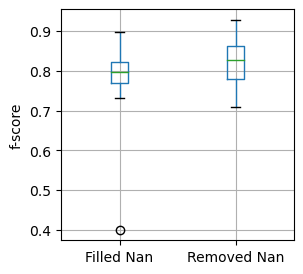

Mean Filled Nan:  0.764048557146016
Mean Removed Nan:  0.8244863854541273
Ttest_relResult(statistic=-1.6848964301369855, pvalue=0.12629190841476884)


In [6]:
decisionTree = DecisionTreeClassifier(criterion='gini')
test_classifier(decisionTree,df,df_notna)

# K-Nearest Neighbor

In [7]:
from sklearn.neighbors import KNeighborsClassifier

Need to select "k" based on the performance
Test the classifier multiple times in order to find an optimal k

Test for k= 5


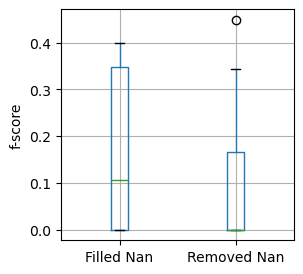

Mean Filled Nan:  0.1687129424056419
Mean Removed Nan:  0.10732220160791589
Ttest_relResult(statistic=1.0016422021335052, pvalue=0.34268445603785497)
Test for k= 6


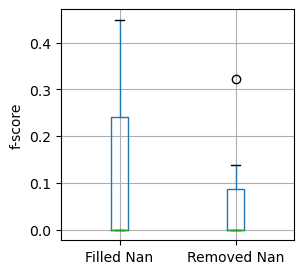

Mean Filled Nan:  0.12264305722288915
Mean Removed Nan:  0.057815873846757834
Ttest_relResult(statistic=0.9901127321153723, pvalue=0.3479897638104319)
Test for k= 7


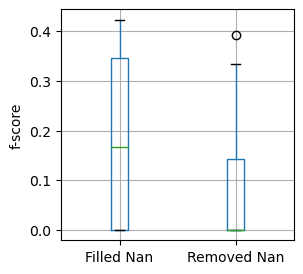

Mean Filled Nan:  0.17874595100328786
Mean Removed Nan:  0.09159663865546218
Ttest_relResult(statistic=1.4034025453827659, pvalue=0.19404477328902908)
Test for k= 8


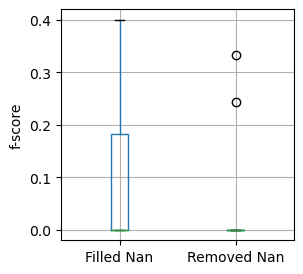

Mean Filled Nan:  0.10072418572418572
Mean Removed Nan:  0.05772357723577236
Ttest_relResult(statistic=0.6410770518414759, pvalue=0.5374531902419393)
Test for k= 9


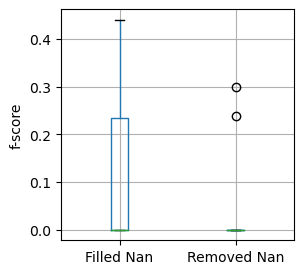

Mean Filled Nan:  0.11090476190476191
Mean Removed Nan:  0.05380952380952381
Ttest_relResult(statistic=0.8200580085912131, pvalue=0.43336384803999595)
Test for k= 10


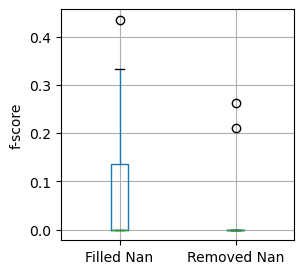

Mean Filled Nan:  0.09499341238471673
Mean Removed Nan:  0.04736842105263158
Ttest_relResult(statistic=0.6937829478759964, pvalue=0.5053289230913259)


In [8]:
for k in range(5,11):  #range does not include 11 but include 10
    print("Test for k=",k)
    knn  = KNeighborsClassifier(n_neighbors=k)
    test_classifier(knn,df,df_notna)

# Naive Bayesian classifier

In [9]:
from sklearn.naive_bayes import BernoulliNB
bc = BernoulliNB(alpha=0)  # no smoothing

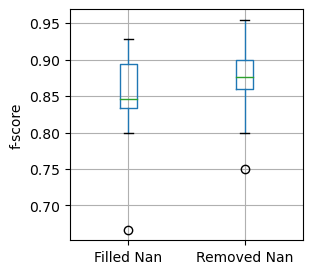

Mean Filled Nan:  0.8442160696849709
Mean Removed Nan:  0.8722707469146209
Ttest_relResult(statistic=-2.0018225099222184, pvalue=0.07632819897192096)


In [10]:
test_classifier(bc,df,df_notna)

NB with features selection perform a f-score that is about 0.89 and the difference between the f-score without features selection is statistically significant

# ENSEMBLE METHOD

# Random Forest Classifier

In [11]:
from sklearn.ensemble import RandomForestClassifier

In [12]:
rf = RandomForestClassifier(bootstrap=True) # uses bootstrap sample

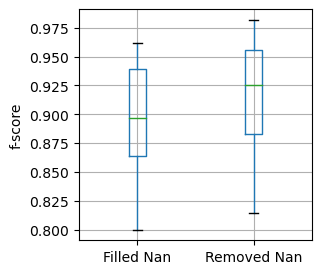

Mean Filled Nan:  0.8951638182391728
Mean Removed Nan:  0.9155375180122102
Ttest_relResult(statistic=-1.1690164558721905, pvalue=0.2724265073454595)


In [13]:
test_classifier(rf,df,df_notna)


As we can see p-value is very high so we cannot assume that there is statistical significance in the difference of f-score values. So we cannot say that features selection really improve the result of the classification of Random Forest Classifier.
Otherwise this classifier performs very well also without features selection, showing an f-score that si about 0.90

# ADABOOST

In [14]:
from sklearn.ensemble import AdaBoostClassifier

In [15]:
ab = AdaBoostClassifier()  #n_estimatore=50 default Decision tree classifier as base estimator

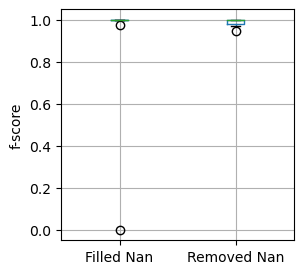

Mean Filled Nan:  0.8974358974358975
Mean Removed Nan:  0.9892675146847162
Ttest_relResult(statistic=-0.9093124885205716, pvalue=0.3868882364892061)


In [16]:
test_classifier(ab,df,df_notna)

We can see that there is an outlier in the metrics result of Filled Nan values. This is considered to be an error that affect negativly the result so this result are not considered so reliable.

/home/salvo/anaconda3/envs/DMML/lib/python3.7/site-packages/sklearn/naive_bayes.py:557: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  % _ALPHA_MIN
/home/salvo/anaconda3/envs/DMML/lib/python3.7/site-packages/sklearn/naive_bayes.py:557: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  % _ALPHA_MIN
/home/salvo/anaconda3/envs/DMML/lib/python3.7/site-packages/sklearn/naive_bayes.py:557: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  % _ALPHA_MIN
/home/salvo/anaconda3/envs/DMML/lib/python3.7/site-packages/sklearn/naive_bayes.py:557: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  % _ALPHA_MIN
/home/salvo/anaconda3/envs/DMML/lib/python3.7/site-packages/sklearn/naive_bayes.py:557: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  % _ALPHA_MIN
/home/salvo/anaconda3/envs/DMML/lib/python3.7/site-packages/sklea

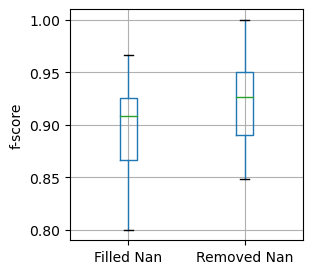

Mean Filled Nan:  0.8984915182283604
Mean Removed Nan:  0.9227952528227926
Ttest_relResult(statistic=-1.439217812273544, pvalue=0.18394585949372752)


In [17]:
ab_nbc = AdaBoostClassifier(base_estimator=bc)  #n_estimatore=50 default, Naive Bayesian Classifier as base estimator
test_classifier(ab_nbc,df,df_notna)

Most reliable result has been found with adaboost that use as base estimator a naive bayesian classifier